In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from threadpoolctl import threadpool_limits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [17]:
data = pd.read_csv('Cleaned_Students_Performance.csv')
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
data[['math_score', 'reading_score', 'writing_score']] = scaler.fit_transform(data[['math_score', 'reading_score', 'writing_score']])
data

,math_score,reading_score,writing_score,total_score,average_score,gender_1,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_1,test_preparation_course_1
0,0.390024,0.193999,0.391492,218,72.666667,False,True,False,False,False,True,False,False,False,False,True,False
1,0.192076,1.427476,1.313269,247,82.333333,False,False,True,False,False,False,False,False,True,False,True,True
2,1.577711,1.770109,1.642475,278,92.666667,False,True,False,False,False,False,False,True,False,False,True,False
3,-1.259543,-0.833899,-1.583744,148,49.333333,True,False,False,False,False,False,False,False,False,False,False,False
4,0.653954,0.605158,0.457333,229,76.333333,True,False,True,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,282,94.000000,False,False,False,False,True,False,False,True,False,False,True,True
996,-0.269803,-0.970952,-0.859491,172,57.333333,True,False,True,False,False,False,True,False,False,False,False,False
997,-0.467751,0.125472,-0.201079,195,65.000000,False,False,True,False,False,False,True,False,False,False,False,True
998,0.126093,0.605158,0.589015,223,74.333333,False,False,False,True,False,False,False,False,True,False,True,True


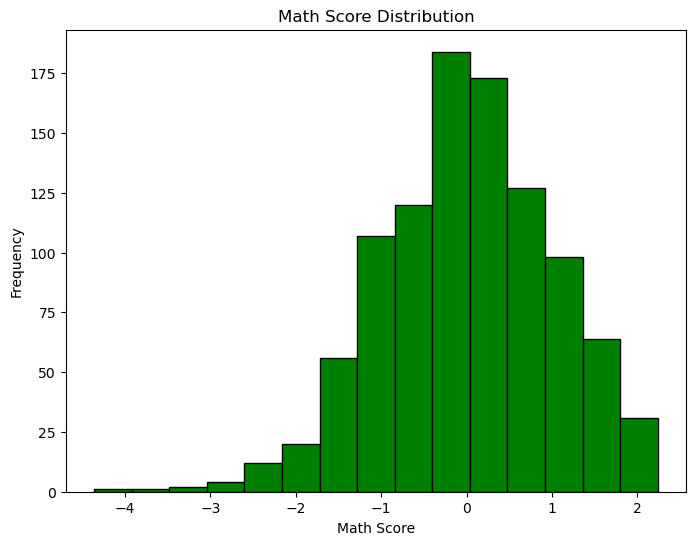

In [18]:
# Exploratory Data Analysis (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(data['math_score'], bins=15, color='green', edgecolor='black')
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

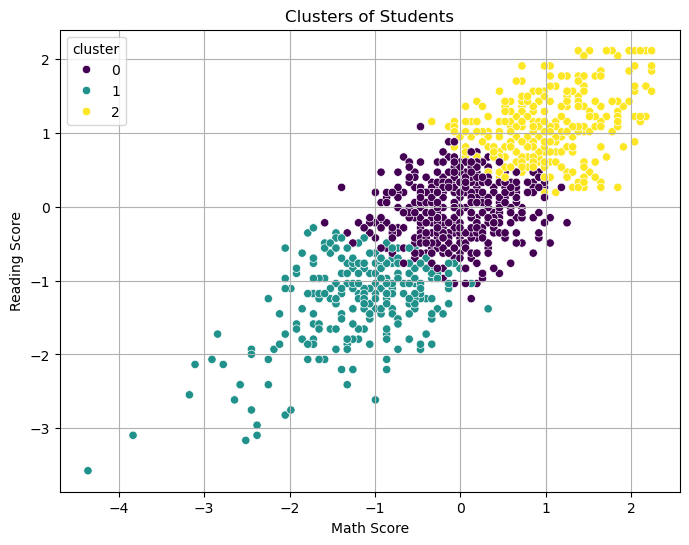

In [20]:
# K-Means Clustering
with threadpool_limits(limits=4):
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['cluster'] = kmeans.fit_predict(data[['math_score', 'reading_score', 'writing_score']])

# Scatter Plot for Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math_score', y='reading_score', hue='cluster', palette='viridis', data=data)
plt.title("Clusters of Students")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.grid(True)
plt.show()


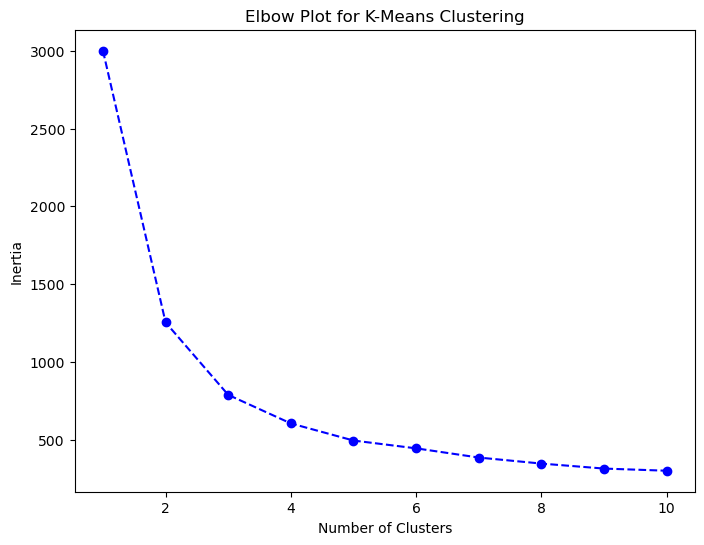

In [19]:
# Elbow Plot
k_values = range(1, 11)
inertia = []
with threadpool_limits(limits=4):
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data[['math_score', 'reading_score', 'writing_score']])
        inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_values,inertia, marker='o', linestyle='--', color='blue')
plt.title("Elbow Plot for K-Means Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

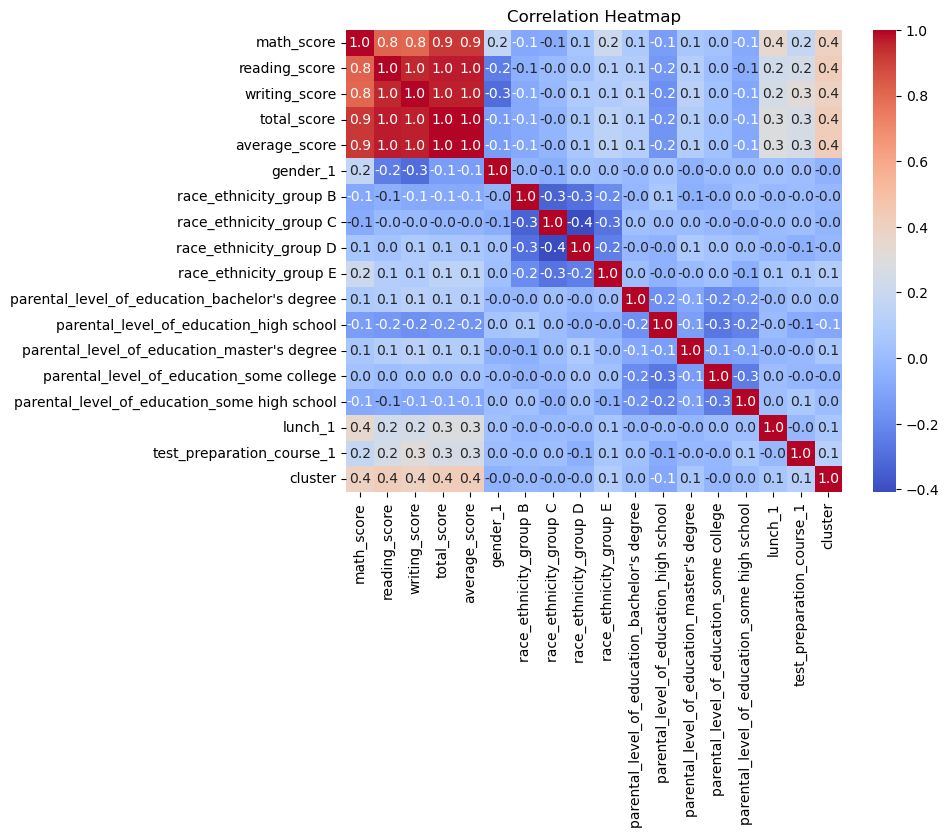

In [22]:
#Correlation heat map
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

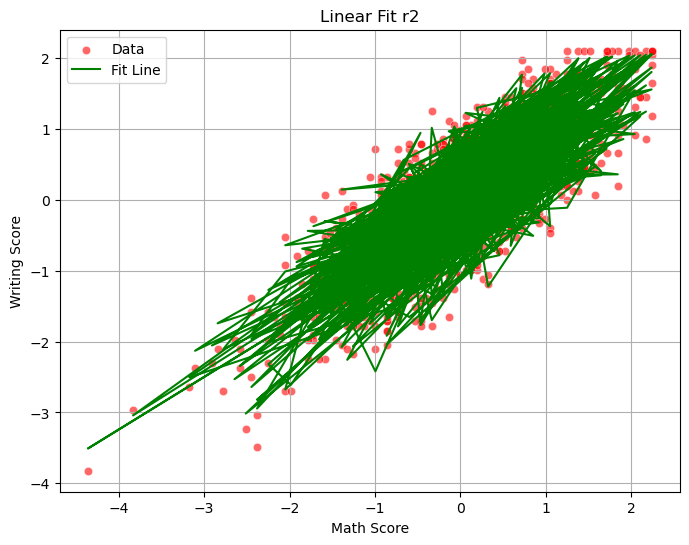

In [21]:
# Linear Regression
X = data[['math_score', 'reading_score']]
y = data['writing_score']
model = LinearRegression()
model.fit(X, y)

# Predict and Evaluate
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['math_score'], y=data['writing_score'], color='red', alpha=0.6, label='Data')
plt.plot(data['math_score'], predictions, color='green', label='Fit Line')
plt.title(f"Linear Fit r2")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.legend()
plt.grid(True)
plt.show()